# Previs√£o de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as an√°lises
- Seu Github com o projeto
- V√≠deo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do neg√≥cio

Uma institui√ß√£o financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cart√µes de cr√©dito dos novos clientes, sem necessariamente solicitar olerites ou documenta√ß√µes que impactem na experi√™ncia do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas atrav√©s de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas vari√°veis que j√° possui em seu banco de dados.

## Etapa 2 Crisp-DM: Entendimento dos dados<a name="2"></a>

<div style="text-align: right"
     
[Voltar ao √≠ndice](#Contents)

### Dicion√°rio de dados <a name="dicionario"></a>

| Vari√°vel              | Descri√ß√£o                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de refer√™ncia de coleta das vari√°veis                                                                 | object           |
| id_cliente            | C√≥digo identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (bin√°ria) |
| posse_de_veiculo      | Indica se o cliente possui ve√≠culo (True = 'Possui ve√≠culo'; False = 'N√£o possui ve√≠culo')                 | bool (bin√°ria)   |
| posse_de_imovel       | Indica se o cliente possui im√≥vel (True = 'Possui im√≥vel'; False = 'N√£o possui im√≥vel')                    | bool (bin√°ria)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empres√°rio, Assalariado, Servidor p√∫blico, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instru√ß√£o do cliente (Prim√°rio, Secund√°rio, Superior incompleto, Superior completo, P√≥s gradua√ß√£o) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, Uni√£o, Casado, Separado, Vi√∫vo)                                         | object           |
| tipo_residencia       | Tipo de resid√™ncia do cliente (Casa, Governamental, Com os pais, Aluguel, Est√∫dio, Comunit√°rio)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na resid√™ncia                                                              | float            |
| **renda**             | Valor num√©rico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao √≠ndice](#Contents)

#### Carregando os pacotes
√â considerado uma boa pr√°tica carregar os pacotes que ser√£o utilizados como a primeira coisa do programa.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

In [29]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [30]:
renda.head(1)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   

   qtd_filhos  tipo_renda    educacao estado_civil tipo_residencia  idade  \
0           0  Empres√°rio  Secund√°rio     Solteiro            Casa     26   

   tempo_emprego  qt_pessoas_residencia    renda  
0        6.60274                    1.0  8060.34

In [31]:
renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade ap√≥s remo√ß√£o das linhas duplicadas:', 
      len(renda.drop_duplicates()), '\n')

renda.drop_duplicates(inplace=True, ignore_index=True)
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade ap√≥s remo√ß√£o das linhas duplicadas: 14593 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4   qtd_filhos             14593 non-null  int64  
 5   tipo_renda             14593 non-null  object 
 6   educacao               14593 non-null  object 
 7   estado_civil           14593 non-null  object 
 8   tipo_residencia        14593 non-null  object 
 9   idade                  14593 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  14593 non-null  float64
 12  renda                  14

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribui√ß√£o de todas as vari√°veis. 

In [32]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof.to_file('./output/renda_analisys.html')


Export report to file: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 77.13it/s]


####  Estat√≠sticas descritivas das vari√°veis quantitativas <a name="describe"></a>



In [7]:
renda.describe().transpose()


count         mean          std         min  \
qtd_filhos             14593.0     0.433290     0.746029    0.000000   
idade                  14593.0    43.868910    11.276626   22.000000   
tempo_emprego          12090.0     7.724567     6.718007    0.117808   
qt_pessoas_residencia  14593.0     2.207086     0.909117    1.000000   
renda                  14593.0  5698.140557  8314.021152  118.710000   

                               25%          50%          75%            max  
qtd_filhos                0.000000     0.000000     1.000000      14.000000  
idade                    34.000000    43.000000    53.000000      68.000000  
tempo_emprego             3.006164     6.013699    10.123288      42.906849  
qt_pessoas_residencia     2.000000     2.000000     3.000000      15.000000  
renda                  2018.880000  3488.410000  6379.570000  245141.670000

In [8]:
renda_quant = renda[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda','posse_de_veiculo','posse_de_imovel']]
renda_quant

qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
0               0     26       6.602740                    1.0   8060.34   
1               0     28       7.183562                    2.0   1852.15   
2               0     35       0.838356                    2.0   2253.89   
3               1     30       4.846575                    3.0   6600.77   
4               0     33       4.293151                    1.0   6475.97   
...           ...    ...            ...                    ...       ...   
14588           0     48      13.887671                    1.0   7990.58   
14589           0     57            NaN                    1.0  10093.45   
14590           0     45       7.832877                    2.0    604.82   
14591           0     36       4.298630                    2.0   3352.27   
14592           2     34       7.219178                    4.0   1160.99   

       posse_de_veiculo  posse_de_imovel  
0                 False             True  
1                  True             True  
2                  True             True  
3                 False             True  
4                  True            False  
...                 ...              ...  
14588             False             True  
14589             False             True  
14590              True             True  
14591              True            False  
14592             False             True  

[14593 rows x 7 columns]

In [9]:
renda_quant.corr()

qtd_filhos     idade  tempo_emprego  \
qtd_filhos               1.000000 -0.360361      -0.063588   
idade                   -0.360361  1.000000       0.321970   
tempo_emprego           -0.063588  0.321970       1.000000   
qt_pessoas_residencia    0.889449 -0.339365      -0.067115   
renda                    0.030296  0.023445       0.385014   
posse_de_veiculo         0.120952 -0.178247      -0.074186   
posse_de_imovel         -0.021670  0.141139       0.011015   

                       qt_pessoas_residencia     renda  posse_de_veiculo  \
qtd_filhos                          0.889449  0.030296          0.120952   
idade                              -0.339365  0.023445         -0.178247   
tempo_emprego                      -0.067115  0.385014         -0.074186   
qt_pessoas_residencia               1.000000  0.048616          0.169019   
renda                               0.048616  1.000000          0.099418   
posse_de_veiculo                    0.169019  0.099418          1.000000   
posse_de_imovel                    -0.022050  0.004188         -0.013238   

                       posse_de_imovel  
qtd_filhos                   -0.021670  
idade                         0.141139  
tempo_emprego                 0.011015  
qt_pessoas_residencia        -0.022050  
renda                         0.004188  
posse_de_veiculo             -0.013238  
posse_de_imovel               1.000000

A partir da matriz de correla√ß√£o, √© poss√≠vel observar que a vari√°vel que apresenta maior rela√ß√£o com a var√≠avel renda √© tempo_emprego, com um √≠ndice de correla√ß√£o de 38,5%.

### Entendimento dos dados - Bivariadas




#### Matriz de dispers√£o <a name="dispersao"></a>


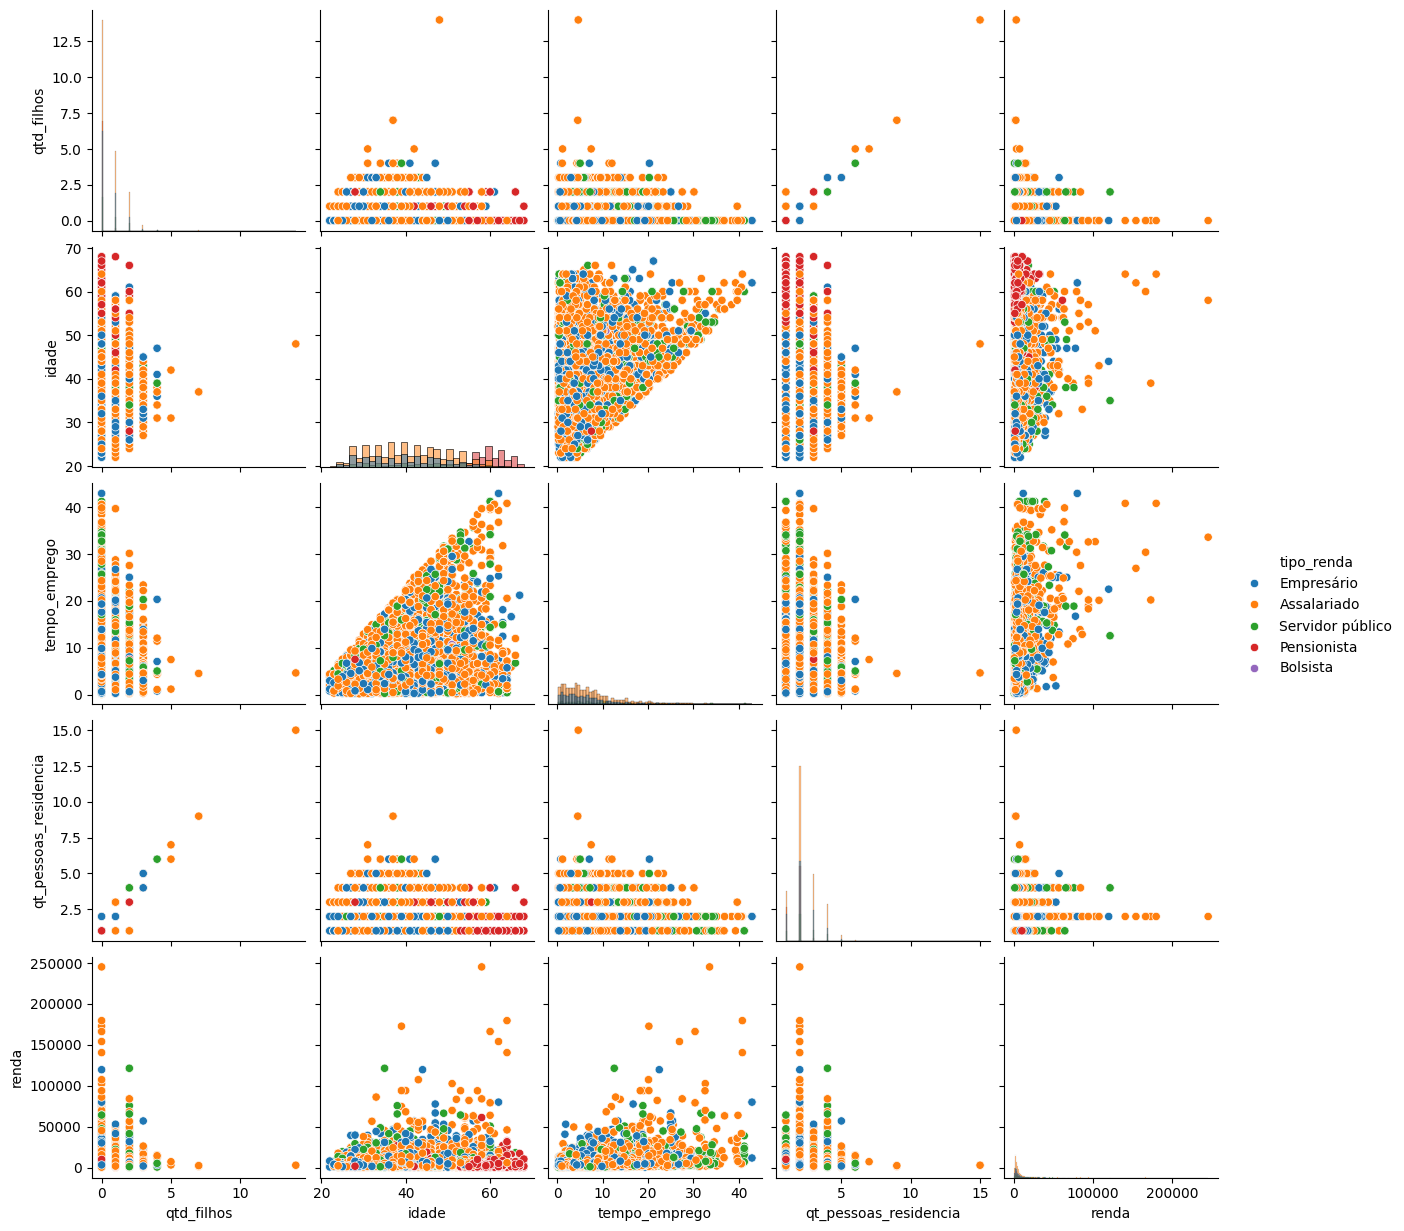

In [10]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao analisar o pairplot, que consiste na matriz de dispers√£o, √© poss√≠vel identificar alguns outliers na vari√°vel renda, os quais podem afetar o resultado da an√°lise de tend√™ncia, apesar de ocorrerem com baixa frequ√™ncia. Al√©m disso, √© observada uma baixa rela√ß√£o entre praticamente quase todas as vari√°veis quantitativas, exceto talvez pela vari√°vel tempo_emprego que parece assumir uma tend√™ncia de crescimento quanto maior o tempo de emprego.

##### Clustermap <a name="clustermap"></a>

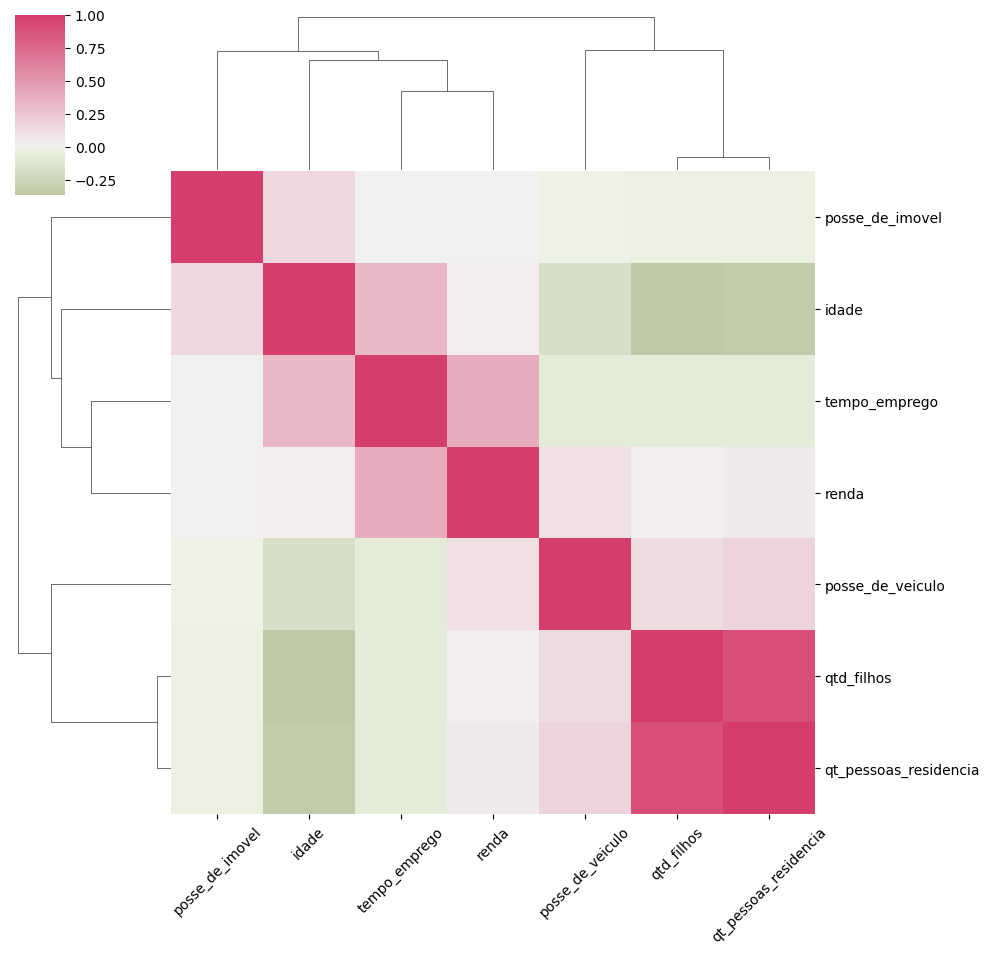

In [11]:
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

ax = sns.clustermap(data=renda_quant.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()

√â poss√≠vel observar que penas a vari√°vel 'tempo_emprego' apresenta um √≠ndice consider√°vel para an√°lise. Al√©m disso, foram apresentadas duas vari√°veis booleanas, 'posse_de_imovel' e 'posse_de_veiculo', onde a vari√°vel que possui mais rela√ß√£o com a renda √© a de posse de ve√≠culo.

#####  Linha de tend√™ncia <a name="tendencia"></a>

In [12]:
plt.figure(figsize=(14,7))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

# Linha de tend√™ncia:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.3')

<Axes: xlabel='tempo_emprego', ylabel='renda'>

√â poss√≠vel identificar facilmente a covari√¢ncia positiva com a inclina√ß√£o da linha de tend√™ncia, podemos afirmar ent√£o que existe uma rela√ß√£o entre os dados de renda e tempo de emprego.

#### An√°lise das vari√°veis qualitativas <a name="qualitativas"></a>

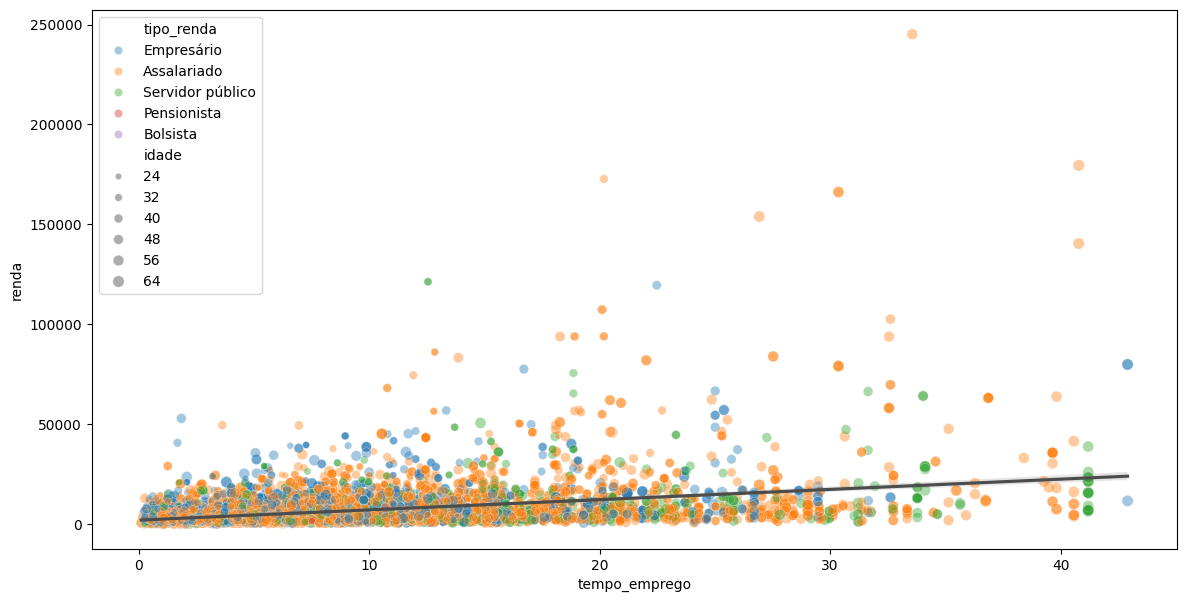

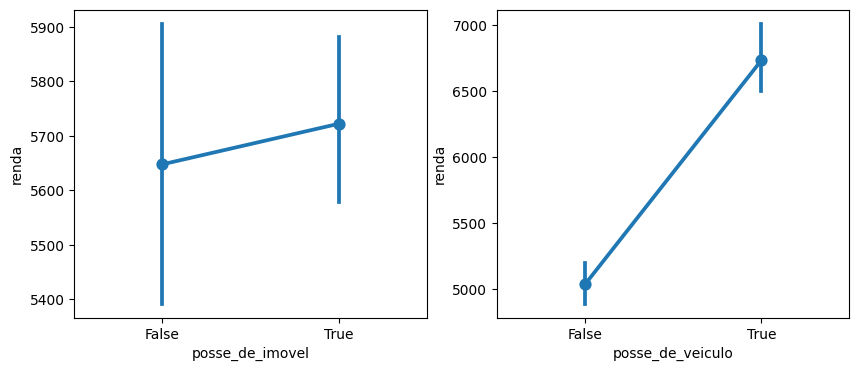

In [13]:
#Os dados que mais mostraram rela√ß√£o com com a vari√°vel renda, al√©m do tempo de emprego foram os dados de posse de ve√≠culo.
#Iremos realizar alguamas visualiza√ß√µes e incluir tamb√©m os dados visuais de posse de im√≥vel para completar essa an√°lise.

plt.rc('figure', figsize=(10,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

Ao comparar os gr√°ficos acima, nota-se que a vari√°vel 'posse_de_ve√≠culo' apresenta maior relev√¢ncia na predi√ß√£o de renda, evidenciada pela maior dist√¢ncia entre os intervalos de confian√ßa para aqueles que possuem e n√£o possuem ve√≠culo, ao contr√°rio da vari√°vel 'posse_de_im√≥vel' que n√£o apresenta diferen√ßa significativa entre as poss√≠veis condi√ß√µes de posse imobili√°ria.

##### An√°lise das vari√°veis qualitativas ao longo do tempo <a name="tempo"></a>

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


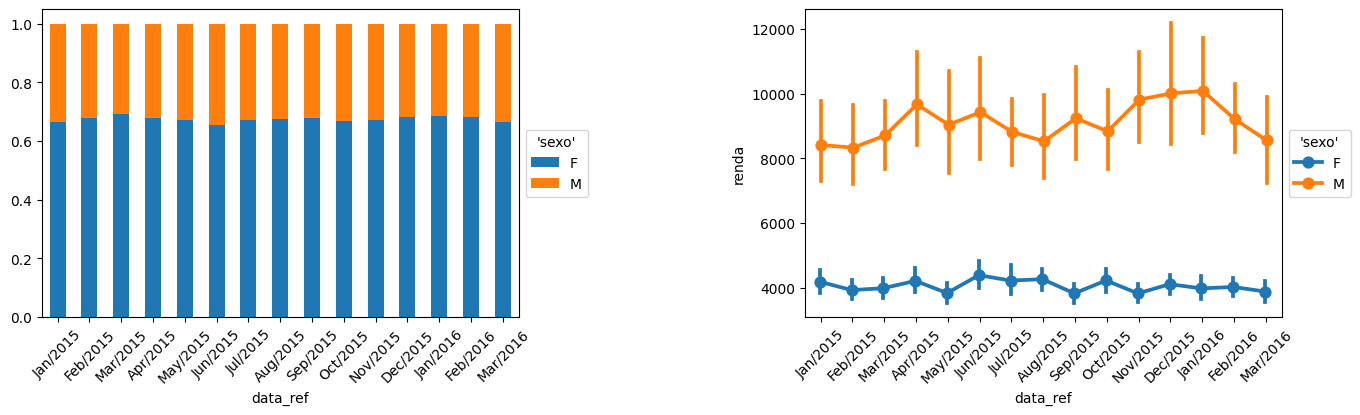

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


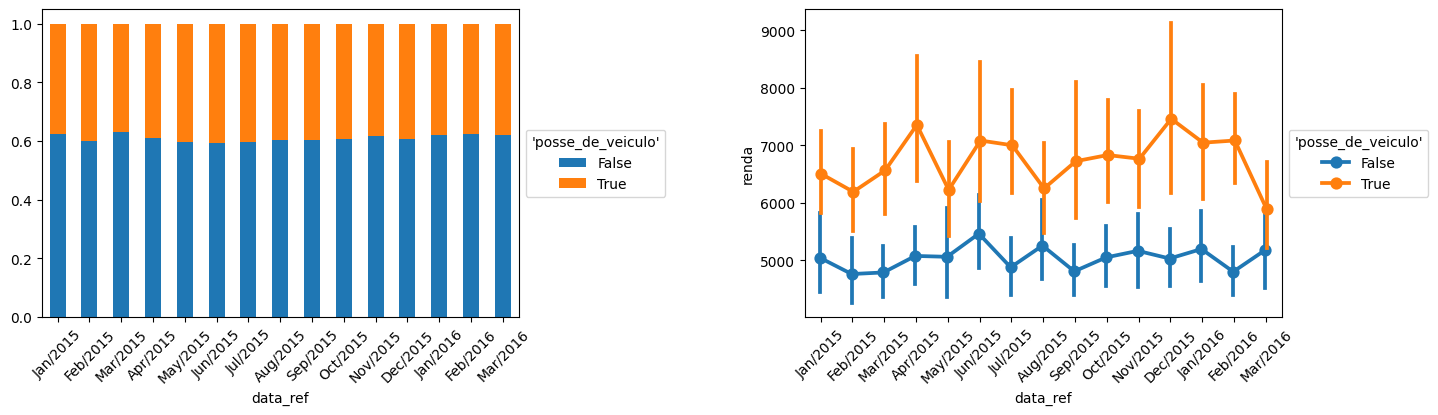

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


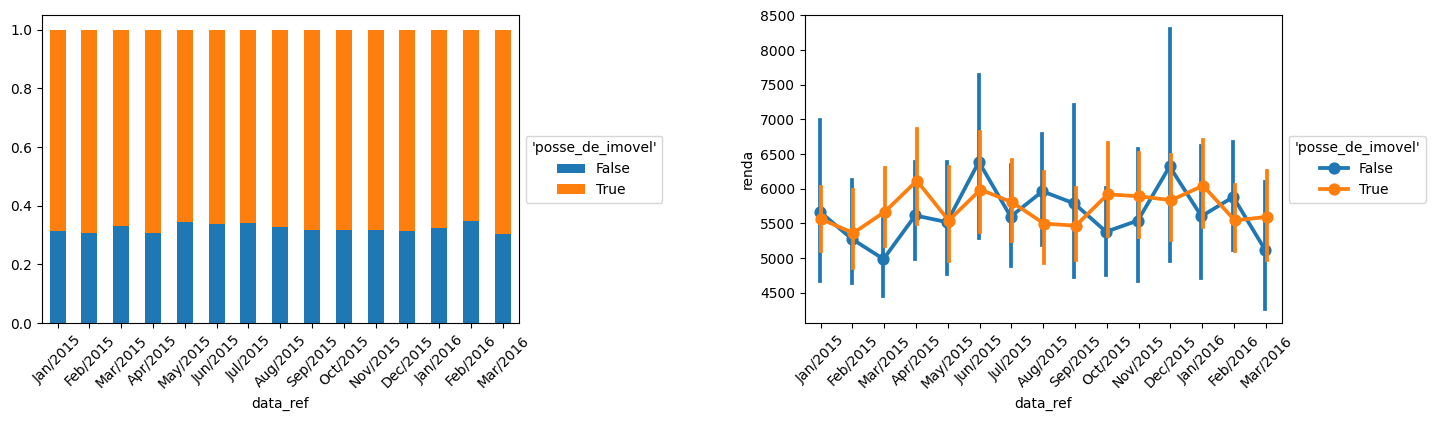

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


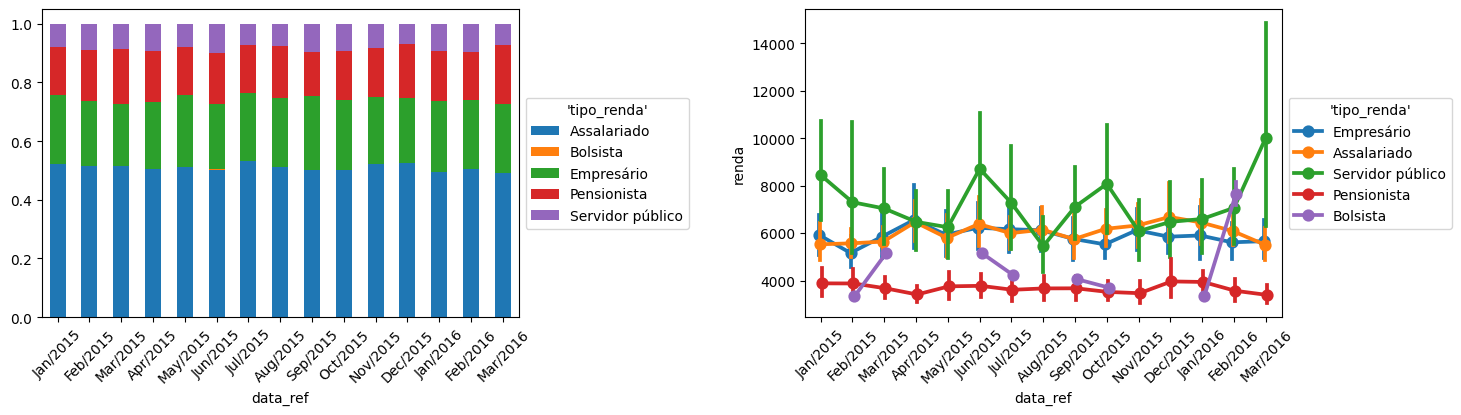

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


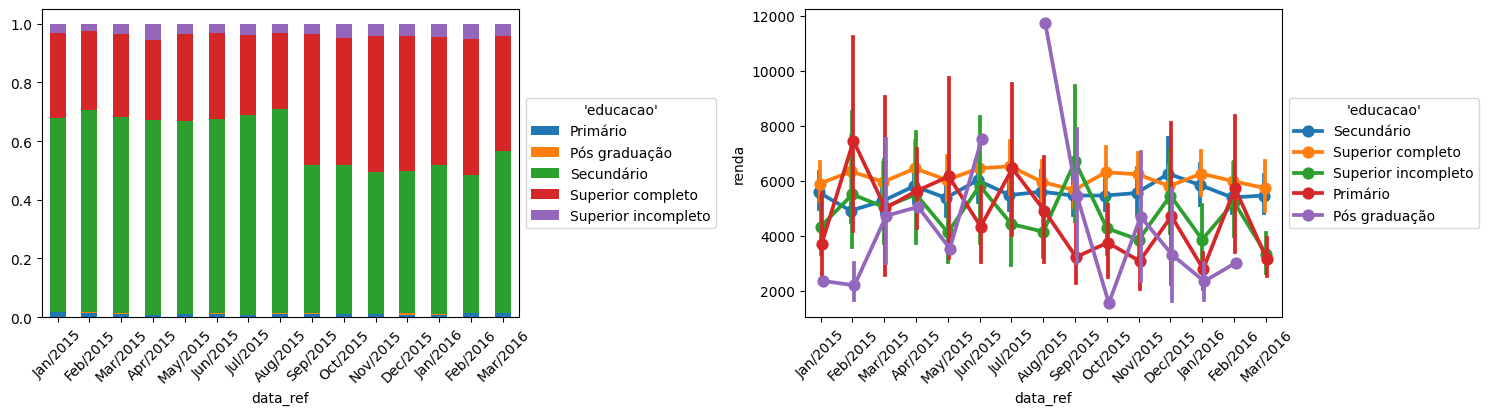

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


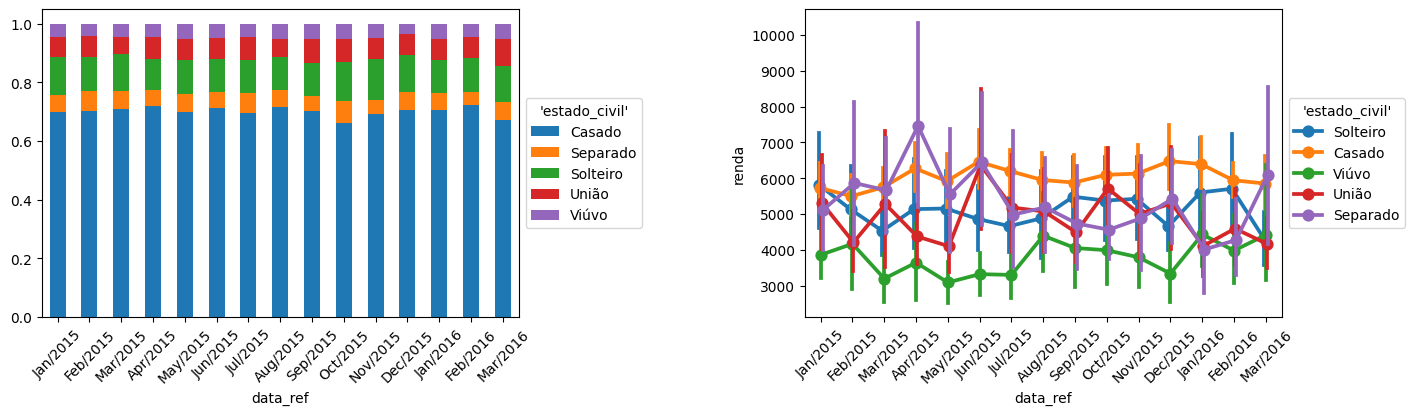

C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
C:\Users\User\AppData\Local\Temp\ipykernel_19628\816965243.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


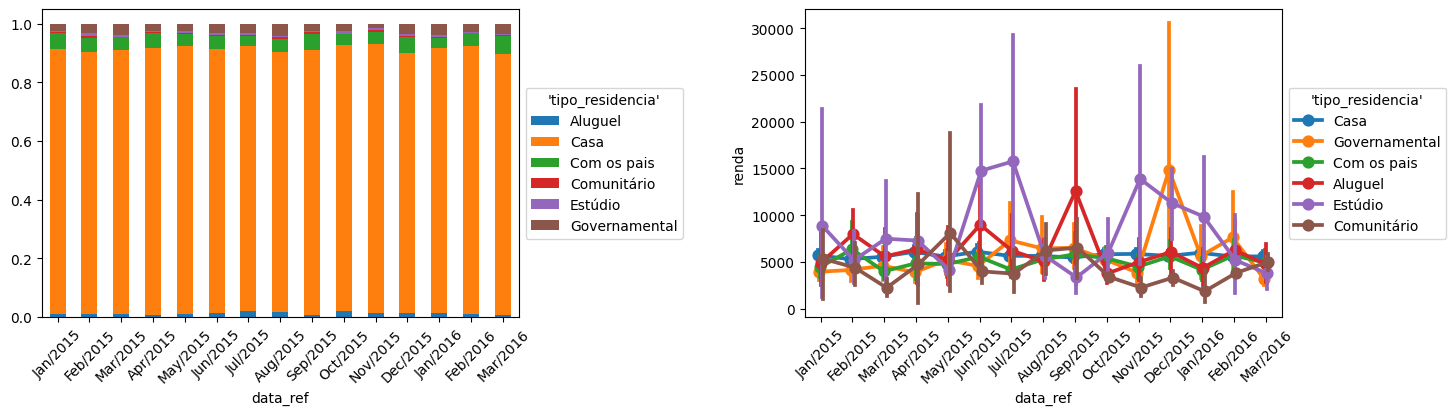

In [14]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis m√©dios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

A an√°lise das vari√°veis qualitativas evidencia a correla√ß√£o da vari√°vel renda com a vari√°vel de posse de ve√≠culo. As demais vari√°veis n√£o representam
correla√ß√£o relevante.

## Etapa 3 Crisp-DM: Prepara√ß√£o dos dados
Nessa etapa realizamos tipicamente as seguintes opera√ß√µes com os dados:

 - **sele√ß√£o**: J√° temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **constru√ß√£o**: constru√ß√£o de novas vari√°veis
 - **integra√ß√£o**: Temos apenas uma fonte de dados, n√£o √© necess√°rio integra√ß√£o
 - **formata√ß√£o**: Os dados j√° se encontram em formatos √∫teis?



<span style="color:red">ESCREVER AQUI</span>


In [15]:
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

tipos_dados  qtd_valores  qtd_categorias
sexo                       object        12090               2
posse_de_veiculo             bool        12090               2
posse_de_imovel              bool        12090               2
qtd_filhos                  int64        12090               8
tipo_renda                 object        12090               5
educacao                   object        12090               5
estado_civil               object        12090               5
tipo_residencia            object        12090               6
idade                       int64        12090              46
tempo_emprego             float64        12090            2589
qt_pessoas_residencia     float64        12090               9
renda                     float64        12090            8126

### Convers√£o das vari√°veis categ√≥ricas em vari√°veis num√©ricas (dummies) <a name="dummies"></a>

In [16]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12090 entries, 0 to 14592
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12090 non-null  bool   
 1   posse_de_imovel                12090 non-null  bool   
 2   qtd_filhos                     12090 non-null  int64  
 3   idade                          12090 non-null  int64  
 4   tempo_emprego                  12090 non-null  float64
 5   qt_pessoas_residencia          12090 non-null  float64
 6   renda                          12090 non-null  float64
 7   sexo_F                         12090 non-null  bool   
 8   sexo_M                         12090 non-null  bool   
 9   tipo_renda_Assalariado         12090 non-null  bool   
 10  tipo_renda_Bolsista            12090 non-null  bool   
 11  tipo_renda_Empres√°rio          12090 non-null  bool   
 12  tipo_renda_Pensionista         12090 non-null  boo

In [17]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a constru√ß√£o do modelo. Os passos t√≠picos s√£o:
- Selecionar a t√©cnica de modelagem
- Desenho do teste
- Avalia√ß√£o do modelo



A t√©cnica escolhida foi o DecisionTreeRegressor, devido √† sua capacidade de lidar com problemas de regress√£o, como a previs√£o de renda dos clientes. Al√©m disso, √°rvores de decis√£o s√£o f√°ceis de interpretar e permitem a identifica√ß√£o dos atributos mais relevantes para a previs√£o da vari√°vel-alvo, tornando-a uma boa escolha para o projeto.


### Divis√£o da base em treino e teste <a name="train_test"></a>

In [18]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12090, 29)
Quantidade de linhas de y: 12090
X_train: (9067, 29)
X_test: (3023, 29)
y_train: (9067,)
y_test: (3023,)


### Sele√ß√£o de hiperpar√¢metros do modelo com for loop <a name="for_loop"></a>

In [19]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_19628\2645755207.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score = pd.concat(objs=[score,


max_depth min_samples_leaf     score
213         8                4  0.417122
543        19                4  0.401091
243         9                4  0.401005
393        14                4  0.400246
245         9                6  0.399395
..        ...              ...       ...
29          1               30  0.056241
3           1                4  0.056241
2           1                3  0.056241
1           1                2  0.056241
0           1                1  0.056241

[600 rows x 3 columns]

### Rodando o modelo


In [20]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

#### Visualiza√ß√£o gr√°fica da √°rvore com plot_tree <a name="plot_tree"></a>

In [21]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns, 
                    filled=True)

<span style="color:red">ESCREVER AQUI</span>


In [22]:
text_tree_print = tree.export_text(decision_tree=reg_tree)
text_tree_print

'|--- feature_4 <= 17.08\n|   |--- feature_6 <= 0.50\n|   |   |--- feature_4 <= 6.93\n|   |   |   |--- feature_4 <= 4.54\n|   |   |   |   |--- feature_4 <= 1.69\n|   |   |   |   |   |--- feature_1 <= 0.50\n|   |   |   |   |   |   |--- feature_3 <= 52.50\n|   |   |   |   |   |   |   |--- feature_2 <= 2.50\n|   |   |   |   |   |   |   |   |--- value: [3237.54]\n|   |   |   |   |   |   |   |--- feature_2 >  2.50\n|   |   |   |   |   |   |   |   |--- value: [1415.27]\n|   |   |   |   |   |   |--- feature_3 >  52.50\n|   |   |   |   |   |   |   |--- feature_3 <= 56.00\n|   |   |   |   |   |   |   |   |--- value: [6817.46]\n|   |   |   |   |   |   |   |--- feature_3 >  56.00\n|   |   |   |   |   |   |   |   |--- value: [4458.54]\n|   |   |   |   |   |--- feature_1 >  0.50\n|   |   |   |   |   |   |--- feature_8 <= 0.50\n|   |   |   |   |   |   |   |--- feature_3 <= 54.50\n|   |   |   |   |   |   |   |   |--- value: [4821.44]\n|   |   |   |   |   |   |   |--- feature_3 >  54.50\n|   |   |   |

## Etapa 5 Crisp-DM: Avalia√ß√£o dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [23]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = {0} para a base de {1} √©: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = 8 para a base de treino √©: 0,60
O coeficiente de determina√ß√£o (ùëÖ2) da √°rvore com profundidade = 8 para a base de teste √©: 0,42 



In [24]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

renda  renda_predict
0      8060.34        3127.79
1      1852.15        7146.41
2      2253.89        2465.37
3      6600.77        3654.23
4      6475.97        5465.31
...        ...            ...
14587  1592.57       13209.09
14588  7990.58        6350.97
14590   604.82        4341.42
14591  3352.27        5465.31
14592  1160.99        3127.79

[12090 rows x 2 columns]

## Etapa 6 Crisp-DM: Implanta√ß√£o
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decis√µes com algum n√≠vel de automa√ß√£o.